In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../ai_medreview/data/data.csv')
data.tail()

,time,rating,free_text,do_better,surgery,pcn,sentiment_free_text,sentiment_score_free_text,sentiment_do_better,sentiment_score_do_better,free_text_len,do_better_len,rating_score,feedback_labels,improvement_labels,submission_id,respondent-id
5192,2024-06-03 03:20:59,Extremely likely,I ve been going to this GP surgery for years a...,NaN,Earls-Court-Surgery,Brompton-Health-PCN,positive,0.964048,neutral,0.0,50.0,0,5.0,Staff Empathy and Compassion,NaN,4p0qO5,aEO6qB
5193,2024-06-03 03:23:49,Neither likely nor unlikely,NaN,NaN,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.000000,neutral,0.0,0.0,0,3.0,NaN,NaN,z1BO5a,aEO6qB
5194,2024-06-03 03:23:54,Neither likely nor unlikely,NaN,NaN,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.000000,neutral,0.0,0.0,0,3.0,NaN,NaN,vd6p9v,aEO6qB
5195,2024-06-03 03:24:01,Likely,NaN,NaN,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.000000,neutral,0.0,0.0,0,4.0,NaN,NaN,RVegNd,aEO6qB
5196,2024-06-03 03:24:07,Don't know,NaN,NaN,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.000000,neutral,0.0,0.0,0,NaN,NaN,NaN,xlboqo,aEO6qB


In [3]:
data = data[(data['sentiment_free_text'] == 'negative')]

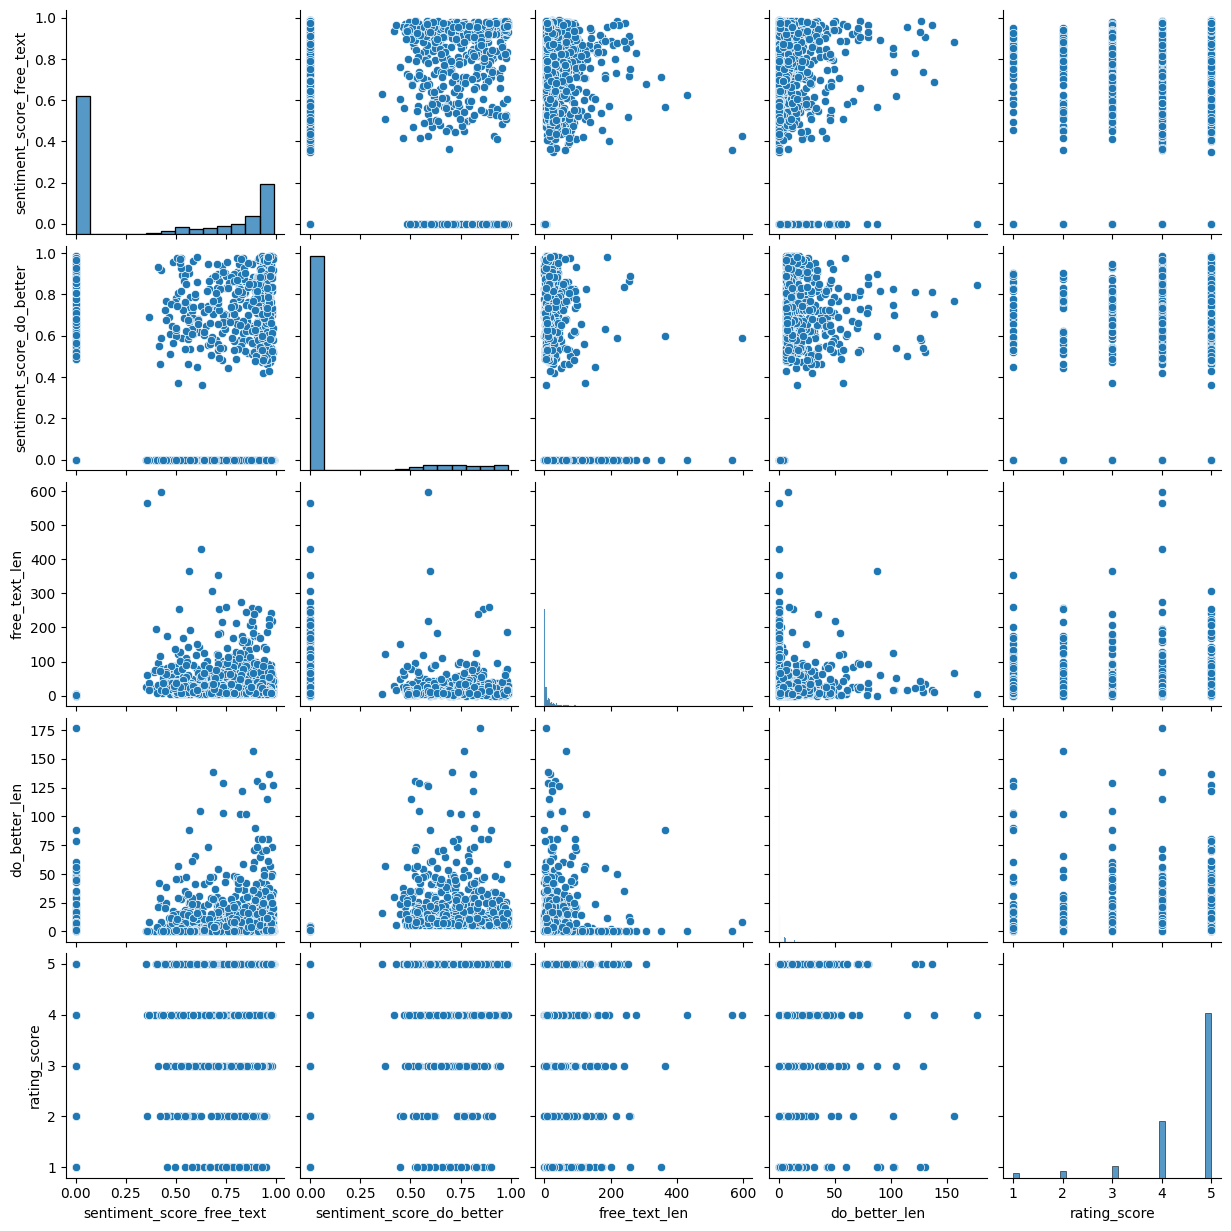

In [3]:
sns.pairplot(data)

In [4]:
data["time"] = pd.to_datetime(data["time"])

In [5]:
data.head()

,time,rating,free_text,do_better,surgery,pcn,sentiment_free_text,sentiment_score_free_text,sentiment_do_better,sentiment_score_do_better,free_text_len,do_better_len,rating_score,feedback_labels,improvement_labels,submission_id,respondent-id
0,2023-06-03 10:11:25,Extremely likely,NaN,NaN,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.000000,neutral,0.0,3.0,1,5.0,NaN,NaN,NaN,NaN
1,2023-06-03 10:11:25,Likely,Providing info about the name of the person vi...,NaN,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.940994,neutral,0.0,15.0,0,4.0,Patient Education and Information,NaN,NaN,NaN
2,2023-06-03 10:11:25,Likely,Did what I went in to do No one else there,NaN,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.789152,neutral,0.0,10.0,1,4.0,Staff Professionalism,NaN,NaN,NaN
3,2023-06-03 10:11:25,Likely,I find Dr PERSON friendly and willing to discu...,NaN,Earls-Court-Surgery,Brompton-Health-PCN,positive,0.803839,neutral,0.0,11.0,1,4.0,Patient Respect,NaN,NaN,NaN
4,2023-06-03 10:11:25,Extremely likely,NaN,NaN,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.000000,neutral,0.0,5.0,4,5.0,NaN,NaN,NaN,NaN


In [5]:
data.dropna(subset='free_text', inplace=True)

In [6]:
# Filter the data to include only those from 'Brompton-Health-PCN'
brompton_data = data[data['pcn'] == 'Brompton-Health-PCN']

# Since we're creating a heatmap, we need to pivot the data to get counts of feedback_labels per surgery
heatmap_data = pd.crosstab(brompton_data['surgery'], brompton_data['feedback_labels'])

# Showing the structure of the heatmap data
heatmap_data.head(), heatmap_data.shape

(feedback_labels                     Accessibility and Convenience  \
 surgery                                                             
 Earls-Court-Medical-Centre                                      0   
 Earls-Court-Surgery                                             1   
 Emperors-Gate-Health-Centre                                     0   
 Health-Partners-at-Violet-Melchett                              9   
 Knightsbridge-Medical-Centre                                    0   
 
 feedback_labels                     Appointment Availability  \
 surgery                                                        
 Earls-Court-Medical-Centre                                 4   
 Earls-Court-Surgery                                        9   
 Emperors-Gate-Health-Centre                                5   
 Health-Partners-at-Violet-Melchett                        33   
 Knightsbridge-Medical-Centre                               1   
 
 feedback_labels                     Communication 

In [7]:
normalized_heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

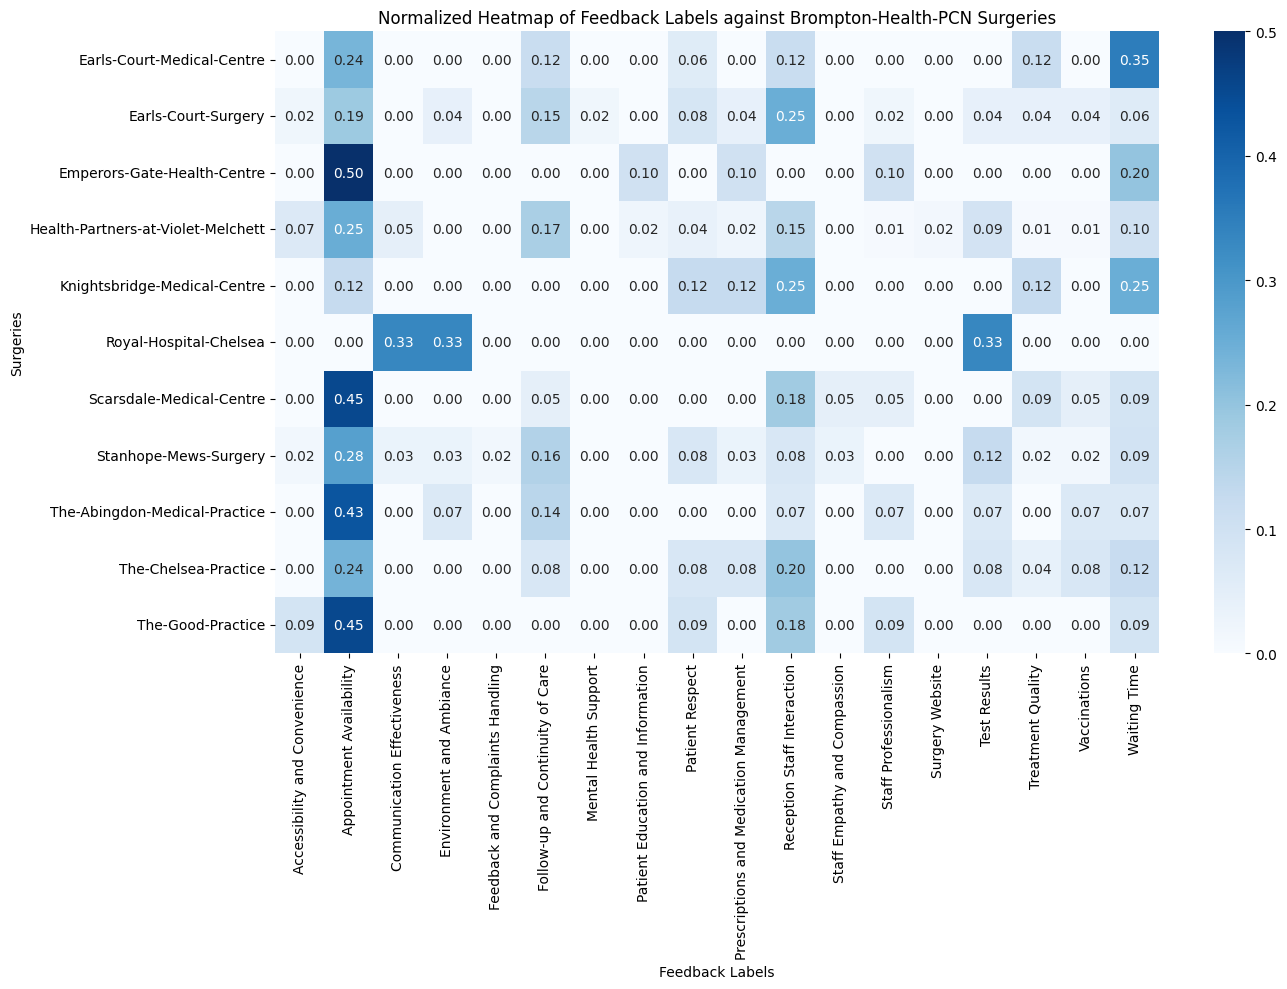

In [8]:
# Create a new heatmap using the normalized data
plt.figure(figsize=(14, 10))
ax = sns.heatmap(normalized_heatmap_data, annot=True, cmap="Blues", fmt=".2f")
plt.title('Normalized Heatmap of Feedback Labels against Brompton-Health-PCN Surgeries')
plt.xlabel('Feedback Labels')
plt.ylabel('Surgeries')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the normalized heatmap
plt.show()

In [9]:
data = pd.read_csv('../ai_medreview/data/data.csv')

In [6]:
data = data[((data['sentiment_free_text'] == 'positive')|(data['sentiment_free_text'] == 'neutral'))]
data.dropna(subset='free_text', inplace=True)
brompton_data = data[data['pcn'] == 'Brompton-Health-PCN']
heatmap_data = pd.crosstab(brompton_data['surgery'], brompton_data['feedback_labels'])
normalized_heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0).T

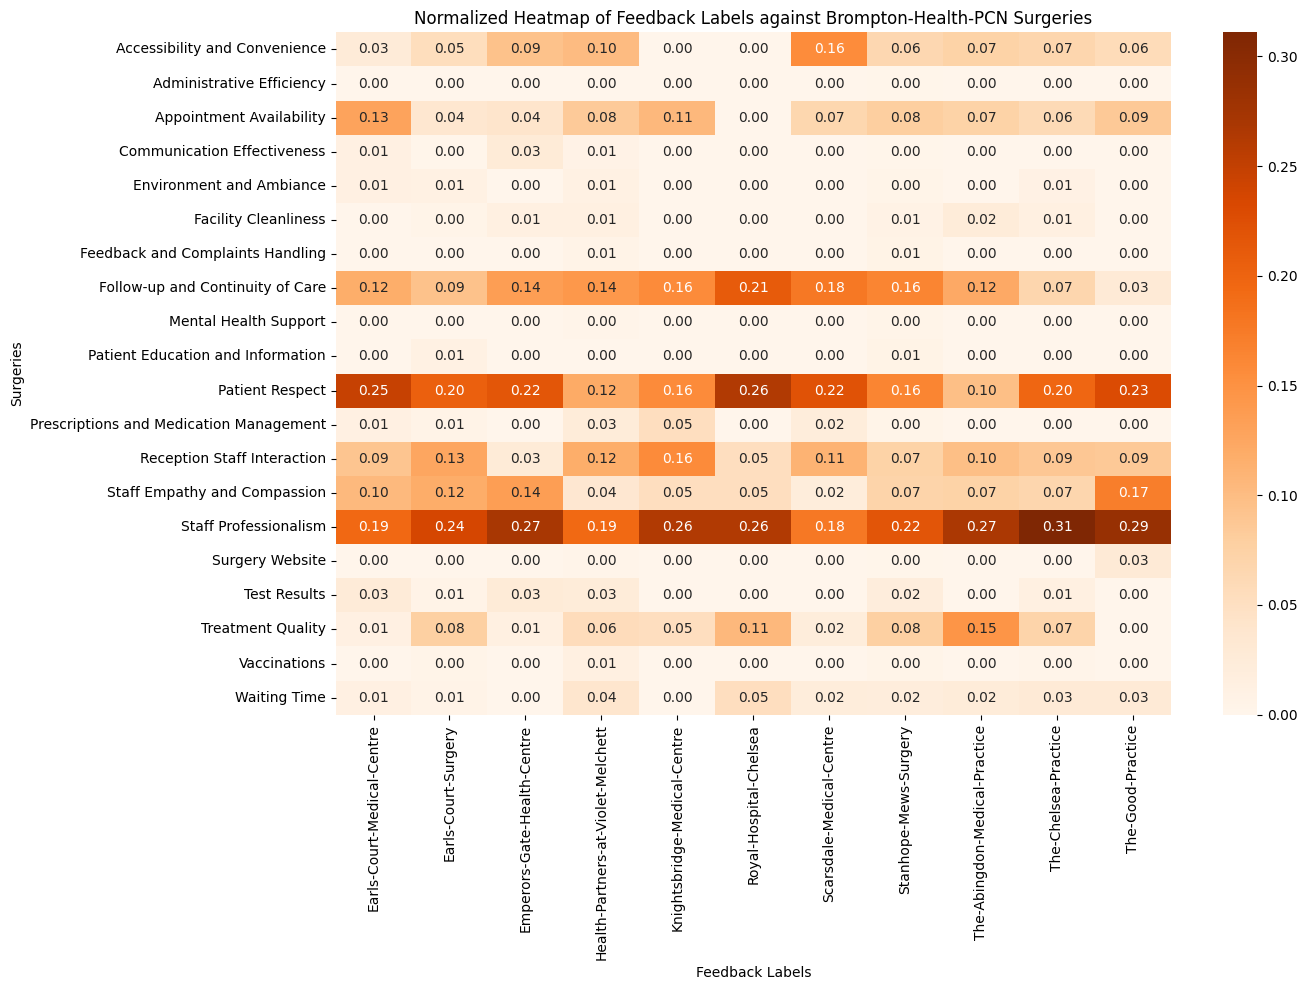

In [7]:
# Create a new heatmap using the normalized data
plt.figure(figsize=(14, 10))
ax = sns.heatmap(normalized_heatmap_data, annot=True, cmap="Oranges", fmt=".2f")
plt.title('Normalized Heatmap of Feedback Labels against Brompton-Health-PCN Surgeries')
plt.xlabel('Feedback Labels')
plt.ylabel('Surgeries')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the normalized heatmap
plt.show()

In [8]:
data

,time,rating,free_text,do_better,surgery,pcn,sentiment_free_text,sentiment_score_free_text,sentiment_do_better,sentiment_score_do_better,free_text_len,do_better_len,rating_score,feedback_labels,improvement_labels,submission_id,respondent-id
1,2023-06-03 10:11:25,Likely,Providing info about the name of the person vi...,NaN,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.940994,neutral,0.000000,15.0,0,4.0,Patient Education and Information,NaN,NaN,NaN
2,2023-06-03 10:11:25,Likely,Did what I went in to do No one else there,NaN,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.789152,neutral,0.000000,10.0,1,4.0,Staff Professionalism,NaN,NaN,NaN
3,2023-06-03 10:11:25,Likely,I find Dr PERSON friendly and willing to discu...,NaN,Earls-Court-Surgery,Brompton-Health-PCN,positive,0.803839,neutral,0.000000,11.0,1,4.0,Patient Respect,NaN,NaN,NaN
5,2023-06-03 10:11:25,Extremely likely,I was dealt with in a friendly and patient man...,NaN,Earls-Court-Surgery,Brompton-Health-PCN,positive,0.768058,neutral,0.000000,18.0,0,5.0,Patient Respect,NaN,NaN,NaN
6,2023-06-03 10:11:25,Unlikely,The Doctors is excellent in service but the fr...,Just change all the front desk staff,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.471643,neutral,0.510841,19.0,7,2.0,Reception Staff Interaction,Reception Staff Interaction,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5188,2024-06-03 03:19:27,Extremely likely,I was blown away by the exceptional care I rec...,NaN,Earls-Court-Surgery,Brompton-Health-PCN,positive,0.968380,neutral,0.000000,101.0,0,5.0,Staff Empathy and Compassion,NaN,WjbglQ,aEO6qB
5189,2024-06-03 03:19:57,Extremely likely,Fantastic experience at this GP surgery The re...,NaN,Earls-Court-Surgery,Brompton-Health-PCN,positive,0.982222,neutral,0.000000,36.0,0,5.0,Reception Staff Interaction,NaN,lM25Y6,aEO6qB
5190,2024-06-03 03:20:17,Extremely likely,I ve had some health issues in the past but th...,NaN,Earls-Court-Surgery,Brompton-Health-PCN,positive,0.827006,neutral,0.000000,48.0,0,5.0,Staff Empathy and Compassion,NaN,DZOYZX,aEO6qB
5191,2024-06-03 03:20:37,Extremely likely,From booking my appointment to being seen by a...,NaN,Earls-Court-Surgery,Brompton-Health-PCN,positive,0.969805,neutral,0.000000,56.0,0,5.0,Staff Professionalism,NaN,ENVgMA,aEO6qB


In [9]:
data.corr()

/var/folders/zk/h05bglw168z9vq1c9b862q480000gn/T/ipykernel_88549/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,sentiment_score_free_text,sentiment_score_do_better,free_text_len,do_better_len,rating_score
sentiment_score_free_text,1.000000,-0.023997,-0.187722,-0.029159,0.343358
sentiment_score_do_better,-0.023997,1.000000,-0.015567,0.601784,-0.102637
free_text_len,-0.187722,-0.015567,1.000000,0.029399,-0.135698
do_better_len,-0.029159,0.601784,0.029399,1.000000,-0.112161
rating_score,0.343358,-0.102637,-0.135698,-0.112161,1.000000


/var/folders/zk/h05bglw168z9vq1c9b862q480000gn/T/ipykernel_88549/4171348650.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


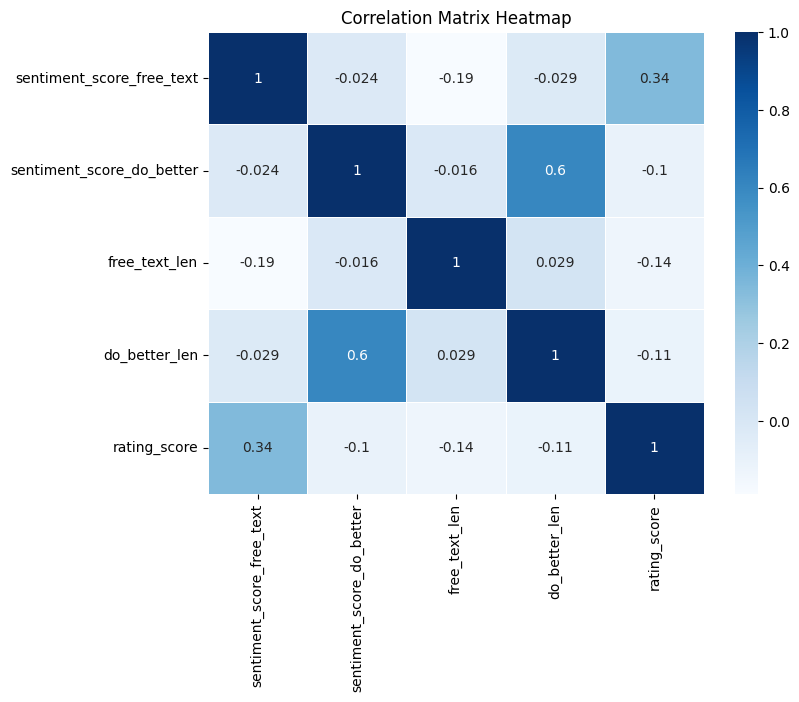

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
data = pd.read_csv('/Volumes/JanBackupDrive/janduplessis883/jan-datasets/sepsis_train.csv')

data.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Sepssis'] = le.fit_transform(data['Sepssis'])

data.head()

In [23]:
data.drop(columns=['ID'], inplace=True)

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00
Sepssis,599.0,0.347245,0.476492,0.000,0.000,0.000,1.000,1.00


In [29]:
data.corr()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
PRG,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631,0.207115
PL,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993,0.449719
PR,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365,0.061086
SK,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360,0.075585
TS,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560,0.145892
M11,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826,0.315894
BD2,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114,0.181561
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368,0.210234
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000,0.062582
Sepssis,0.207115,0.449719,0.061086,0.075585,0.145892,0.315894,0.181561,0.210234,0.062582,1.000000


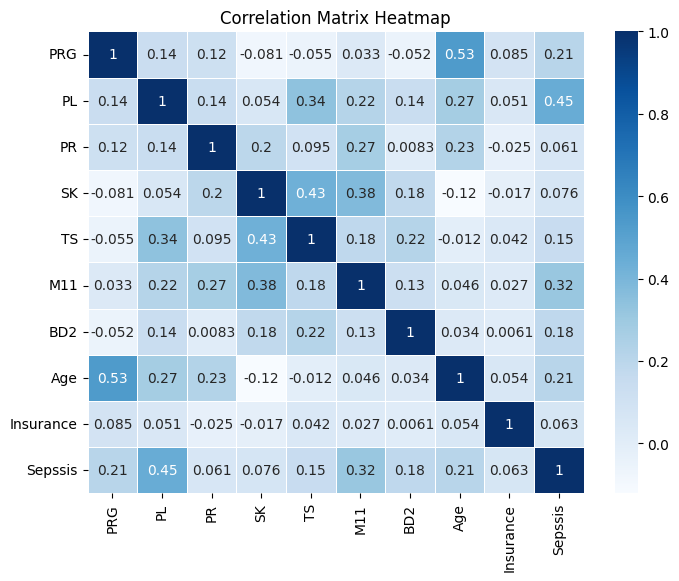

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [31]:
import yellowbrick

ModuleNotFoundError: No module named 'yellowbrick'